In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

**Dunn Index**

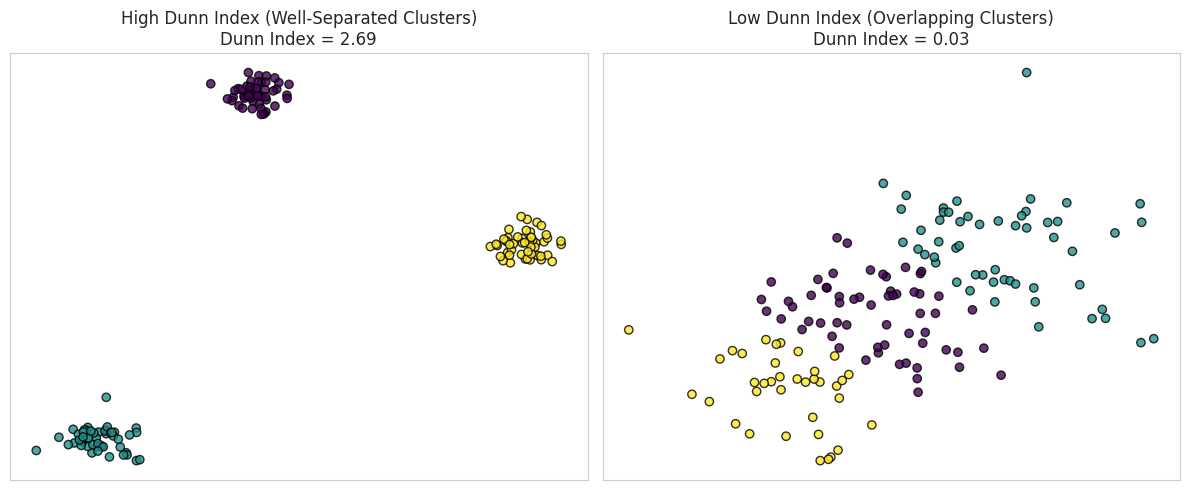

In [3]:
# Function to compute Dunn Index
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)

    # Compute intra-cluster distances (cluster diameters)
    intra_distances = []
    for cluster in unique_clusters:
        cluster_points = X[labels == cluster]
        if len(cluster_points) > 1:
            max_intra_dist = np.max(cdist(cluster_points, cluster_points))
            intra_distances.append(max_intra_dist)

    max_diameter = max(intra_distances)

    # Compute inter-cluster distances (minimum between-cluster distances)
    inter_distances = []
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            cluster_i = X[labels == unique_clusters[i]]
            cluster_j = X[labels == unique_clusters[j]]
            min_inter_dist = np.min(cdist(cluster_i, cluster_j))
            inter_distances.append(min_inter_dist)

    min_inter_cluster_distance = min(inter_distances)

    # Compute Dunn Index
    return min_inter_cluster_distance / max_diameter

# Set style
sns.set_style("whitegrid")

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# -------- High Dunn Index (Well-Separated Clusters) --------
X_high, y_high = make_blobs(n_samples=150, centers=3, cluster_std=0.5, random_state=42)

# Apply K-Means clustering
kmeans_high = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_high = kmeans_high.fit_predict(X_high)

# Compute Dunn Index
dunn_high = dunn_index(X_high, labels_high)

# Plot High Dunn Index
axes[0].scatter(X_high[:, 0], X_high[:, 1], c=labels_high, cmap="viridis", edgecolor="black", alpha=0.8)
axes[0].set_title(f"High Dunn Index (Well-Separated Clusters)\nDunn Index = {dunn_high:.2f}")
axes[0].set_xticks([])
axes[0].set_yticks([])

# -------- Low Dunn Index (Overlapping Clusters) --------
np.random.seed(42)
X_low = np.vstack([
    np.random.randn(50, 2) * 0.8 + np.array([0, 0]),
    np.random.randn(50, 2) * 0.8 + np.array([1, 1]),
    np.random.randn(50, 2) * 0.8 + np.array([2, 2]),
])
y_low_true = np.array([0] * 50 + [1] * 50 + [2] * 50)

# Apply K-Means clustering
kmeans_low = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_low = kmeans_low.fit_predict(X_low)

# Compute Dunn Index
dunn_low = dunn_index(X_low, labels_low)

# Plot Low Dunn Index
axes[1].scatter(X_low[:, 0], X_low[:, 1], c=labels_low, cmap="viridis", edgecolor="black", alpha=0.8)
axes[1].set_title(f"Low Dunn Index (Overlapping Clusters)\nDunn Index = {dunn_low:.2f}")
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()
plt.show()
